In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
# Read in our data from the Master player information csv file
# Separate out the two columns that we need
masterfile = './Data/Master.csv'
master_df = pd.read_csv(masterfile)
master_df.head()
small_df = master_df[['playerID','birthMonth']]
small_df.head()

,playerID,birthMonth
0,aardsda01,12.0
1,aaronha01,2.0
2,aaronto01,8.0
3,aasedo01,9.0
4,abadan01,8.0


In [3]:
# Import our Player award data
awardfile = './Data/AwardsPlayers.csv'
awards_df = pd.read_csv(awardfile)
awards_df.head()

,playerID,awardID,yearID,lgID,tie,notes
0,bondto01,Pitching Triple Crown,1877,NL,NaN,NaN
1,hinespa01,Triple Crown,1878,NL,NaN,NaN
2,heckegu01,Pitching Triple Crown,1884,AA,NaN,NaN
3,radboch01,Pitching Triple Crown,1884,NL,NaN,NaN
4,oneilti01,Triple Crown,1887,AA,NaN,NaN


In [4]:
# Check the shape of the dataframes so we know what kind of data we're dealing with
print(master_df.shape)
print(awards_df.shape)

(18846, 24)
(6078, 6)


In [26]:
# Combine the awards by player - > basically create a count of how many awards each player has earned over their career
awards_df = awards_df.groupby('playerID').count().sort_values('awardID', ascending = False)

In [6]:
# Combine birth month and our award count
combined_df = pd.merge(small_df,awards_df,on = 'playerID',how = 'right')
combined_df = combined_df.sort_values('awardID',ascending = False)
combined_df.head()

,playerID,birthMonth,awardID,yearID,lgID,tie,notes
108,bondsba01,7.0,47,47,47,0,34
1279,willite01,8.0,39,39,39,0,28
306,dimagjo01,11.0,36,36,36,0,30
848,musiast01,11.0,34,34,34,0,24
1032,ruthba01,2.0,33,33,33,0,32


In [7]:
# Group our dataframe again by birth month -> Answer the question: "How many awards have people born in X month won?"
month_df = combined_df.groupby('birthMonth').sum()
month_df = month_df.reset_index()
month_df.head()

,birthMonth,awardID,yearID,lgID,tie,notes
0,1.0,335,335,335,3,221
1,2.0,434,434,434,3,365
2,3.0,472,472,472,5,360
3,4.0,654,654,654,2,514
4,5.0,587,587,587,3,455


In [8]:
# Import our batting data
battingfile = './Data/Batting.csv'
batting_df = pd.read_csv(battingfile)
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


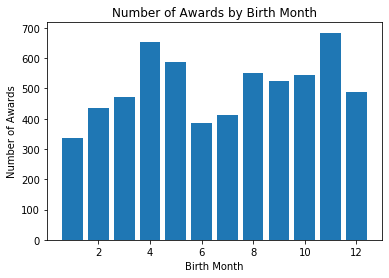

In [9]:
# Plot birth month and award count
plt.bar(month_df['birthMonth'],month_df['awardID'])
plt.ylabel('Number of Awards')
plt.xlabel('Birth Month')
plt.title('Number of Awards by Birth Month')
plt.show()

This graph shows the number of awards by birth month. It indicates that April and November have the highest number of awards in the range of upper 600 in awards. This is contrasted with the lowest range which is January and June with mid 300 in awards.
One theory we found indicates that children born in both November and around May tend to be the oldest in their grade. This means that they're brought into sports while they are more dominant above their peers. This means that they rise to the top of a given grade more effectively and are more likely to make it into the major league.

In [27]:
# Filter out only the data that we need from the batting dataframe and group by player to combine their stats over
# their entire career
small_batting_df = batting_df[['playerID','R','H','RBI','HR','AB']]
small_batting_df = small_batting_df.groupby('playerID').sum()
batting_month_df = pd.merge(small_batting_df,small_df,on = 'playerID',how = 'left')
batting_month_df.head()

,playerID,R,H,RBI,HR,AB,birthMonth
0,aardsda01,0.0,0.0,0.0,0.0,4.0,12.0
1,aaronha01,2174.0,3771.0,2297.0,755.0,12364.0,2.0
2,aaronto01,102.0,216.0,94.0,13.0,944.0,8.0
3,aasedo01,0.0,0.0,0.0,0.0,5.0,9.0
4,abadan01,1.0,2.0,0.0,0.0,21.0,8.0


In [28]:
# Group this batting data by month and bump month out of the index for use while plotting
batting_month_df = batting_month_df.groupby('birthMonth').sum()
batting_month_df = batting_month_df.reset_index()

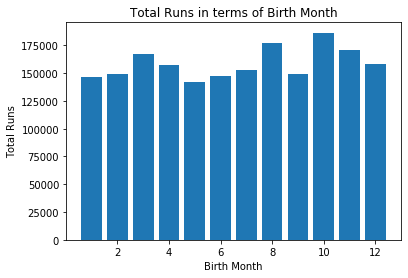

In [30]:
# Plot birth month and number of runs scored by all players
plt.bar(month_df['birthMonth'],batting_month_df['R'])
plt.ylabel('Total Runs')
plt.xlabel('Birth Month')
plt.title('Total Runs in terms of Birth Month')
plt.show()

This graph shows the runs scored by players born in each month. According to the chart it indicates that August and November may be significantly higher than the other months.

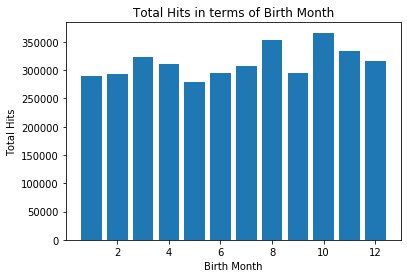

In [31]:
# Plot birth month and number of Hits by all players
plt.bar(batting_month_df['birthMonth'],batting_month_df['H'])
plt.ylabel('Total Hits')
plt.xlabel('Birth Month')
plt.title('Total Hits in terms of Birth Month')
plt.show()

This graph shows the number of hits by players born in each month. Unsurprisingly this chart is nearly identical to the above chart but with a larger magnitude.

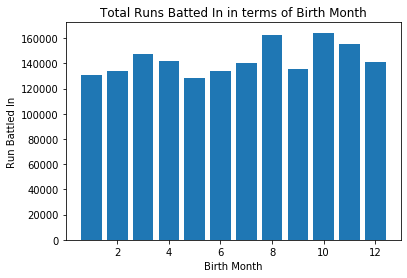

In [33]:
# Plot birth month and number of Runs Batted In by all players
plt.bar(batting_month_df['birthMonth'],batting_month_df['RBI'])
plt.ylabel('Run Battled In')
plt.xlabel('Birth Month')
plt.title('Total Runs Batted In in terms of Birth Month')
plt.show()

This graph shows the number of Runs Batted In by each player by birth month. As before, this chart is very similar to the above charts. Players tend to have roughly similar numbers of Runs batted in and Runs for a given number of hits.

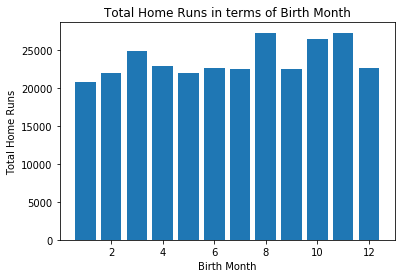

In [34]:
# Plot birth month and number Home Runs by all players
plt.bar(batting_month_df['birthMonth'],batting_month_df['HR'])
plt.ylabel('Total Home Runs')
plt.xlabel('Birth Month')
plt.title('Total Home Runs in terms of Birth Month')
plt.show()

This graph shows the number of Home Runs by each player by birth month. This has a similar shape as the above graphs for an identical reason to the previous cell, the rate of homeruns tends to be relatively constant per the number of hits.

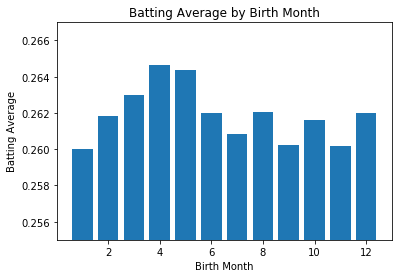

In [36]:
# Plot birth month and Average Batting Average by all players
plt.bar(batting_month_df['birthMonth'],batting_month_df['H']/batting_month_df['AB'])
plt.ylim([0.255,0.267])
plt.title('Batting Average by Birth Month')
plt.ylabel('Batting Average')
plt.xlabel('Birth Month')
plt.show()

This graph shows the average batting average for all players born in each month. The only reason there appears to be a noticeable difference between the months is because the ylimits have been very zoomed in. There is basically no trend in batting average by birth month.

In [17]:
# Create a dataframe which adds up the number of the players that are in each birth month
combined_df = pd.merge(small_df,awards_df,on = 'playerID',how = 'right')
month_count = combined_df['birthMonth'].value_counts().to_frame()
month_count = month_count.reset_index()
combined_df = combined_df.groupby('playerID').sum()
combined_df = combined_df.reset_index()

In [37]:
# Visualize the number of players in each month
month_count

,index,birthMonth
0,4.0,128
1,10.0,126
2,8.0,126
3,11.0,125
4,5.0,114
5,9.0,112
6,3.0,109
7,7.0,106
8,12.0,100
9,2.0,98


In [19]:
# Add in the number of people in the birth month
results_df = pd.merge(combined_df,month_count, right_on = 'index',left_on = 'birthMonth',how = 'left')
results_df = results_df.rename(columns = {'birthMonth_x': 'birthMonth','birthMonth_y':'MonthCount'})
results_df.head()

,playerID,birthMonth,awardID,yearID,lgID,tie,notes,index,MonthCount
0,aaronha01,2.0,16,16,16,0,12,2.0,98
1,abbotji01,9.0,2,2,2,0,1,9.0,112
2,abernte02,3.0,2,2,2,0,0,3.0,109
3,abreubo01,3.0,2,2,2,0,2,3.0,109
4,abreujo02,1.0,2,2,2,0,1,1.0,91


In [20]:
# Evaluate the average number of awards a given player has
results_df['Average Award'] = results_df['awardID'] / results_df['MonthCount']
results_df

,playerID,birthMonth,awardID,yearID,lgID,tie,notes,index,MonthCount,Average Award
0,aaronha01,2.0,16,16,16,0,12,2.0,98,0.163265
1,abbotji01,9.0,2,2,2,0,1,9.0,112,0.017857
2,abernte02,3.0,2,2,2,0,0,3.0,109,0.018349
3,abreubo01,3.0,2,2,2,0,2,3.0,109,0.018349
4,abreujo02,1.0,2,2,2,0,1,1.0,91,0.021978
...,...,...,...,...,...,...,...,...,...,...
1318,zambrca01,6.0,3,3,3,0,3,6.0,88,0.034091
1319,zimmehe01,2.0,5,5,5,0,5,2.0,98,0.051020
1320,zimmery01,9.0,4,4,4,0,3,9.0,112,0.035714
1321,ziskri01,2.0,2,2,2,0,2,2.0,98,0.020408


In [21]:
# Group by birth month
birthmonthresults_df = results_df.groupby('birthMonth').sum()
birthmonthresults_df = birthmonthresults_df.reset_index()

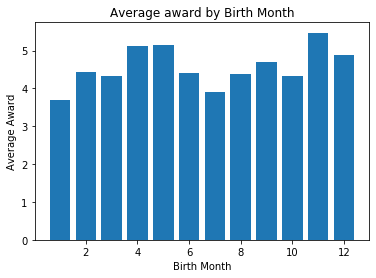

In [38]:
# Plot birth month and average award across each birth month
plt.bar(birthmonthresults_df['birthMonth'],birthmonthresults_df['Average Award'])
plt.title('Average award by Birth Month')
plt.ylabel('Average Award')
plt.xlabel('Birth Month')
plt.show()

In [23]:
# Create a list for all months
months = [1,2,3,4,5,6,7,8,9,10,11,12]

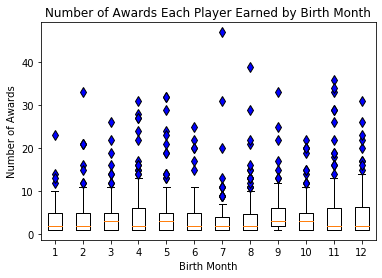

In [39]:
# Loop through our combined awards and months dataframe and pull out the number of awards each player has earned
awards = [[] for i in months]

for month in months:

    temp_df = results_df.loc[results_df['birthMonth'] == month,:]
    
    for i in temp_df['awardID']:
        awards[months.index(month)].append(i)
        
        
        

flierprops = {'marker': 'd','markerfacecolor': 'blue','markersize':7}


# Plot the data for each month
plt.boxplot(awards,labels = months,flierprops = flierprops)
plt.title('Number of Awards Each Player Earned by Birth Month')
plt.xlabel('Birth Month')
plt.ylabel('Number of Awards')
plt.show()

This chart displays the population of each birth month and the number of awards each player earned. As we can the number of awards is clustered around 0 and there outliers all the way up to Barry Bonds in July with 47 awards.